In [1]:
#Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import folium
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
#Option set to display all columns
pd.set_option('display.max_columns', None)

In [3]:
noise_df = pd.read_csv("data/311_Service_Requests_Noise_Complaints_from_2016.csv")

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
noise_df.shape

(419654, 53)

In [5]:
noise_df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,34440200,09/30/2016 11:44:00 AM,10/05/2016 11:41:00 AM,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,10038.0,111 FULTON STREET,FULTON STREET,WILLIAM ST,DUTCH ST,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection det...,10/05/2016 11:41:00 AM,01 MANHATTAN,MANHATTAN,982367.0,197857.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.709748,-74.006792,"(40.70974831269426, -74.00679194227898)"
1,34440868,09/30/2016 05:07:00 PM,10/05/2016 09:06:00 AM,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,11216.0,1311 PACIFIC STREET,PACIFIC STREET,NOSTRAND AVE,NEW YORK AVE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaN,The Department of Environmental Protection det...,10/05/2016 09:06:00 AM,08 BROOKLYN,BROOKLYN,998463.0,186150.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.677604,-73.948759,"(40.67760409805561, -73.94875870826627)"
2,34444617,10/01/2016 08:42:00 PM,10/05/2016 11:59:00 AM,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,11231.0,95 DIKEMAN STREET,DIKEMAN STREET,RICHARDS ST,VAN BRUNT ST,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaN,The Department of Environmental Protection det...,10/05/2016 11:59:00 AM,06 BROOKLYN,BROOKLYN,980620.0,185732.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676467,-74.013087,"(40.67646744834844, -74.01308680144253)"
3,34445224,10/01/2016 01:41:00 AM,10/05/2016 11:45:00 AM,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,11354.0,143-08 ROOSEVELT AVENUE,ROOSEVELT AVENUE,BOWNE ST,PARSONS BLVD,NaN,NaN,ADDRESS,Flushing,NaN,NaN,Closed,NaN,The Department of Environmental Protection det...,10/05/2016 11:45:00 AM,07 QUEENS,QUEENS,1033005.0,216614.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.761097,-73.824006,"(40.76109741839995, -73.82400602410654)"
4,34445505,10/01/2016 06:43:00 PM,10/05/2016 11:53:00 AM,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,11377.0,50-29 CELTIC AVENUE,CELTIC AVENUE,50 AVE,43 ST,NaN,NaN,ADDRESS,Woodside,NaN,NaN,Closed,NaN,The Department of Environmental Protection det...,10/05/2016 11:53:00 AM,02 QUEENS,QUEENS,1005773.0,207914.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.737326,-73.922335,"(40.73732635345773, -73.92233483940846)"


# Data Cleanup

In [6]:
noise_df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         5766
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                             0
Location Type                      58410
Incident Zip                        2242
Incident Address                   48412
Street Name                        48412
Cross Street 1                     46935
Cross Street 2                     47593
Intersection Street 1             371641
Intersection Street 2             372111
Address Type                        1648
City                                2240
Landmark                          419465
Facility Type                      60744
Status                                 0
Due Date                           58616
Resolution Description              2832
Resolution Action Updated Date      4509
Community Board                        0
Borough         

In [7]:
delete_columns = ["Intersection Street 1", "Intersection Street 2", "Address Type", "Landmark", "Facility Type",\
                  "Status", "X Coordinate (State Plane)", "Y Coordinate (State Plane)", "Park Facility Name",\
                  "Park Borough", "School Name", "School Number", "School Region", "School Code",\
                  "School Phone Number", 
                  "School Address", "School City", "School State", "School Zip", "School Not Found",\
                  "School or Citywide Complaint", "Vehicle Type", "Taxi Company Borough", "Taxi Pick Up Location",\
                  "Bridge Highway Name", "Bridge Highway Direction", "Road Ramp", "Bridge Highway Segment",\
                  "Garage Lot Name", "Ferry Direction", "Ferry Terminal Name","Due Date","Resolution Description", \
                  "Resolution Action Updated Date","Incident Address","Street Name","Cross Street 1","Cross Street 2",\
                  "Location Type"]

noise_df.drop(delete_columns, axis=1, inplace=True)

In [8]:
#New shape after dropping columns
noise_df.shape

(419654, 14)

In [9]:
#New null sum by column after dropping columns
noise_df.isnull().sum()

Unique Key            0
Created Date          0
Closed Date        5766
Agency                0
Agency Name           0
Complaint Type        0
Descriptor            0
Incident Zip       2242
City               2240
Community Board       0
Borough               0
Latitude           3300
Longitude          3300
Location           3300
dtype: int64

In [10]:
#Drop NAs in several categories and print new null sums
noise_df = noise_df.dropna(subset=['Latitude',"Longitude","Complaint Type", "Incident Zip"], how='any')
noise_df.isnull().sum()

Unique Key            0
Created Date          0
Closed Date        4486
Agency                0
Agency Name           0
Complaint Type        0
Descriptor            0
Incident Zip          0
City                  0
Community Board       0
Borough               0
Latitude              0
Longitude             0
Location              0
dtype: int64

In [ ]:
noise_df.head(5)

In [11]:
#Change incident_zip column datatype from float to int
noise_df['Incident Zip'] = noise_df['Incident Zip'].astype(int)
noise_df['Incident Zip'].dtype

dtype('int64')

In [12]:
#Cleaning column name syntax
noise_df.columns = ['unique_key','created_date', 'closed_date', 'agency', 'agency_name','complaint_type',\
                    'descriptor', 'incident_zip', 'city','community_board', 'borough', 'latitude', 'longitude',\
                    'location']

noise_df.head(5)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,city,community_board,borough,latitude,longitude,location
0,34440200,09/30/2016 11:44:00 AM,10/05/2016 11:41:00 AM,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",10038,NEW YORK,01 MANHATTAN,MANHATTAN,40.709748,-74.006792,"(40.70974831269426, -74.00679194227898)"
1,34440868,09/30/2016 05:07:00 PM,10/05/2016 09:06:00 AM,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",11216,BROOKLYN,08 BROOKLYN,BROOKLYN,40.677604,-73.948759,"(40.67760409805561, -73.94875870826627)"
2,34444617,10/01/2016 08:42:00 PM,10/05/2016 11:59:00 AM,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",11231,BROOKLYN,06 BROOKLYN,BROOKLYN,40.676467,-74.013087,"(40.67646744834844, -74.01308680144253)"
3,34445224,10/01/2016 01:41:00 AM,10/05/2016 11:45:00 AM,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",11354,Flushing,07 QUEENS,QUEENS,40.761097,-73.824006,"(40.76109741839995, -73.82400602410654)"
4,34445505,10/01/2016 06:43:00 PM,10/05/2016 11:53:00 AM,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",11377,Woodside,02 QUEENS,QUEENS,40.737326,-73.922335,"(40.73732635345773, -73.92233483940846)"


In [13]:
noise_df["incident_zip"].unique()

array([10038, 11216, 11231, 11354, 11377, 11106, 11210, 11374, 11221,
       11370, 11101, 10305, 10306, 11694, 11215, 11238, 10302, 10009,
       10128, 10012, 11237, 11419, 10003, 11433, 11375, 11225, 11249,
       10468, 10025, 10017, 10452, 10464, 11103, 10007, 11228, 11234,
       11204, 10006, 11367, 10472, 10466, 11201, 11233, 10005, 10027,
       10314, 10458, 11235, 10022, 11361, 11209, 11205, 10033, 10019,
       10036, 11360, 10032, 10016, 10456, 10011, 11211, 10029, 11356,
       11203, 11385, 11372, 10002, 10455, 11358, 10035, 10461, 10010,
       11105, 10469, 11223, 10014, 11691, 10023, 11220, 11369, 10471,
       11226, 11102, 11206, 11222, 11207, 11217, 10021, 10030, 10465,
       10001, 11416, 11434, 10040, 11435, 10034, 10013, 10467, 11418,
       11230, 10039, 11366, 11212, 11411, 11417, 11420, 11423, 10031,
       10457, 10065, 11214, 10018, 10026, 10460, 11426, 11229, 11213,
       10308, 11232, 10301, 10069, 10473, 11208, 10004, 10028, 11368,
       11355, 10462,

# Data Analysis

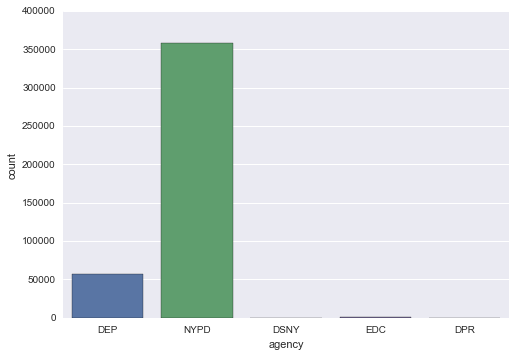

In [14]:
#count by agency
agency_count = sns.countplot(x="agency", data=noise_df)

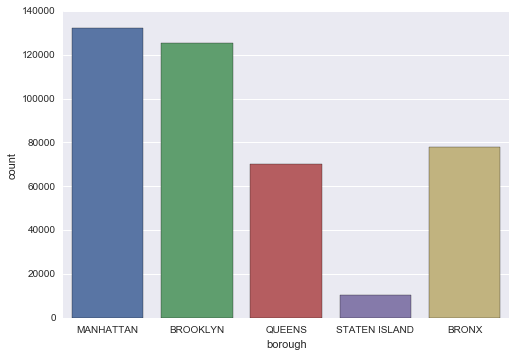

In [15]:
#count by borough
agency_count = sns.countplot(x="borough", data=noise_df)

# Choropleth Map

In [32]:
#choropleth map

zipcode_geo = pd.read_csv("data/zip_to_zcta_2016.csv")


zip_data = noise_df["incident_zip"].value_counts()
zip_count = pd.DataFrame(zip_data).reset_index()
zip_count.columns = ["zip_code","count"]


#Let Folium determine the scale
map = folium.Map(location=[40.7128, -74.0059], zoom_start=13)
map.choropleth(geo_path=zipcode_geo, data=zip_count,
             columns=["zip_code","count"],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2)

#map.save('nyc_by_zipcode.html')

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
noise_df["incident_zip"].value_counts()

# TO DO 

In [ ]:
"""
0) Update README
00) Clean up zip code instances
1) Compare number of complaints by month, then by borough
2) Compare number of complaints by time of day, then by borough
3) Compare number of complaints by day of week, then by borough
4) Zipcode=10032 stats 
5) Top 10 zipcodes by month, time of day and day of the week
6) Visualize with Choropleth Map of NYC by Zip Code

#count by create time
#count by create date
#count by descriptor
#count by top incident zip
#count by top days of the years
#count by month of the year
#count by zipcode=10032
"""

In [26]:
t = noise_df["incident_zip"].value_counts()
s = pd.DataFrame(t).reset_index()
s.columns = ["zip_code","count"]
s

,zip_code,count
0,10031,8060
1,11226,7861
2,10040,7575
3,11205,6952
4,10034,6728
5,10456,6700
6,10002,6574
7,11221,6261
8,10467,6252
9,11216,6209
